In [3]:
import numpy as np 
import pandas as pd   
import matplotlib.pyplot as plt   
import seaborn as sns   


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.preprocessing import Normalizer 
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier 


from collections import Counter


In [4]:
#iris=datasets.load_iris()
#iris_d=iris.data
#print(iris.feature_names)
#iris_d[:10]

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names']+['target'])

iris_df.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h>SPLITING THE DATA</h>

In [6]:
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)


<h>NORMALIZATION</h>

In [8]:
scaler = Normalizer().fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)


In [9]:
print(x_train[:5])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
84                 5.4               3.0                4.5               1.5
27                 5.2               3.5                1.5               0.2
127                6.1               3.0                4.9               1.8
132                6.4               2.8                5.6               2.2


In [10]:
print(normalized_x_train[:5])

[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Text(0.5, 0.98, 'before normalization')

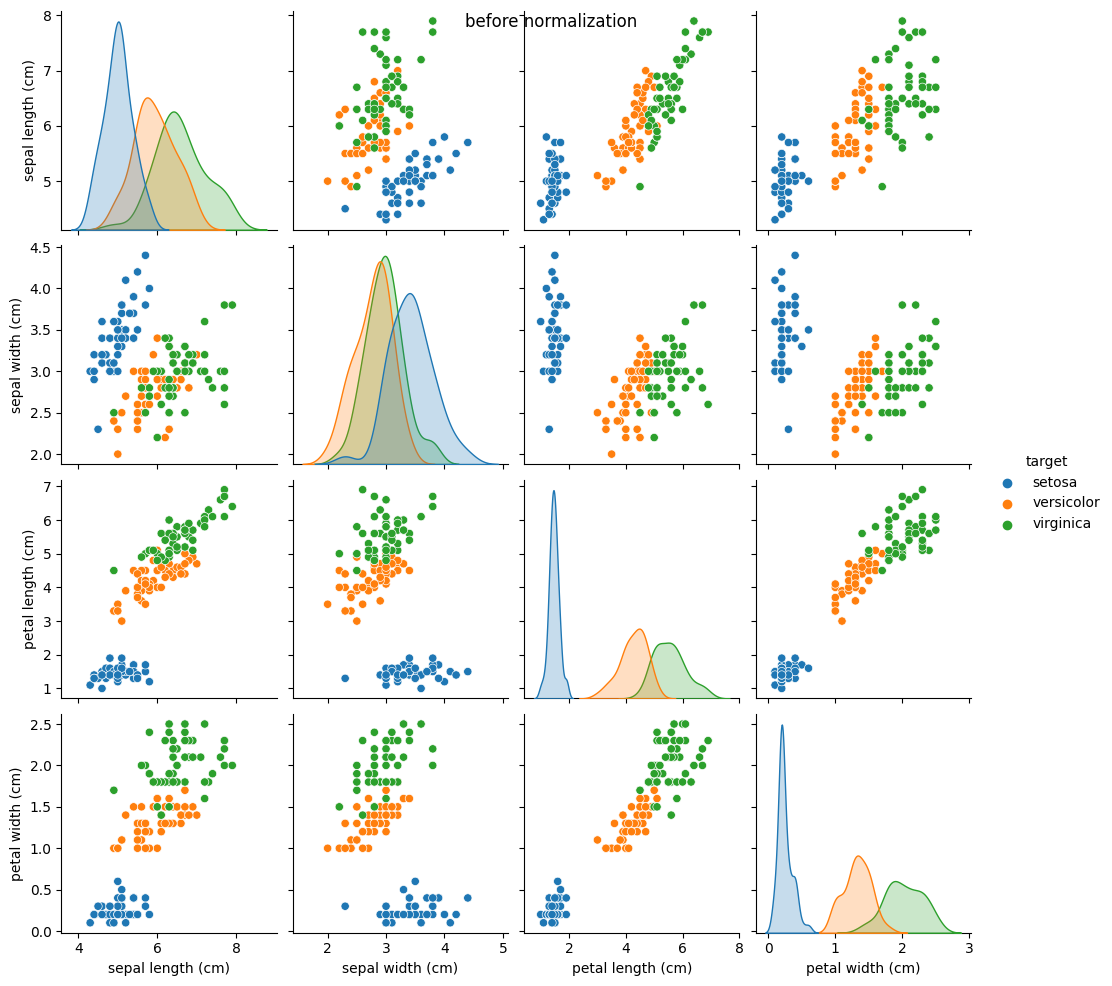

In [11]:
#virsualization before and after 
di={0.0:'setosa',1.0:'versicolor',2.0:'virginica'}
before=sns.pairplot(iris_df.replace({"target":di}),hue='target')
before.fig.suptitle('before normalization')


Text(0.5, 0.98, 'after normalization')

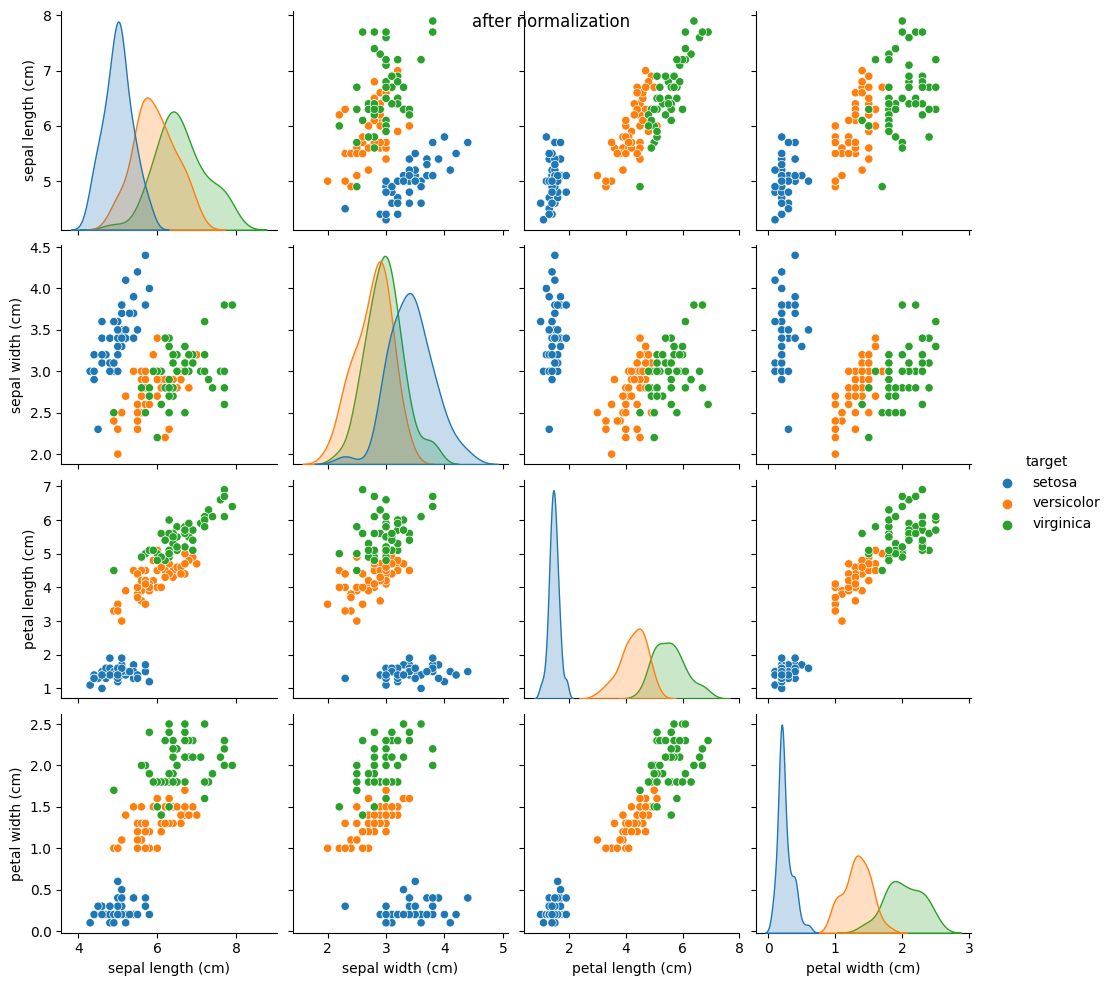

In [12]:


#after normalization
iris_df_norm = pd.DataFrame(data=np.c_[normalized_x_train, y_train],
                            columns=iris['feature_names']+['target'])

di={0.0:'setosa',1.0:'versicolor',2.0:'virginica'}
after=sns.pairplot(iris_df.replace({"target":di}),hue='target')
after.fig.suptitle('after normalization')

c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

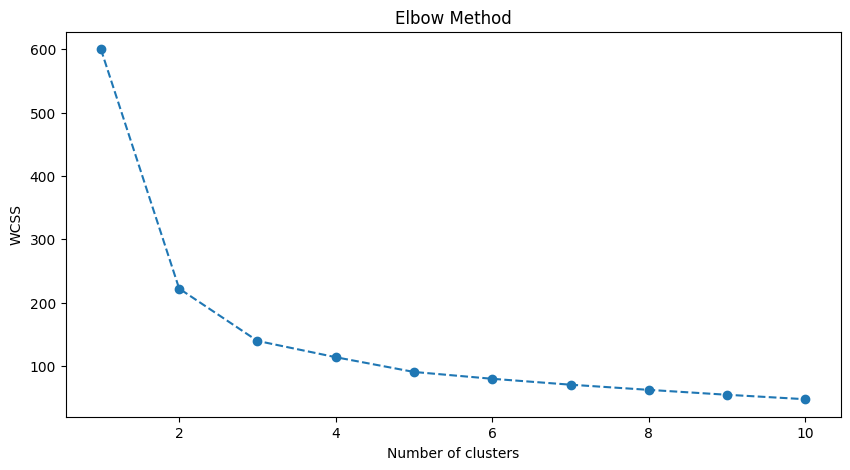

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

# Scale the data (standardization)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Perform K-means clustering with a range of K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal K
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [18]:
#intialize kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)


In [20]:
kmeans.fit(iris_df)

c:\Users\Ali Nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [32]:
cluster_labels = kmeans.predict(iris_df)
print(cluster_labels[50:100])



[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


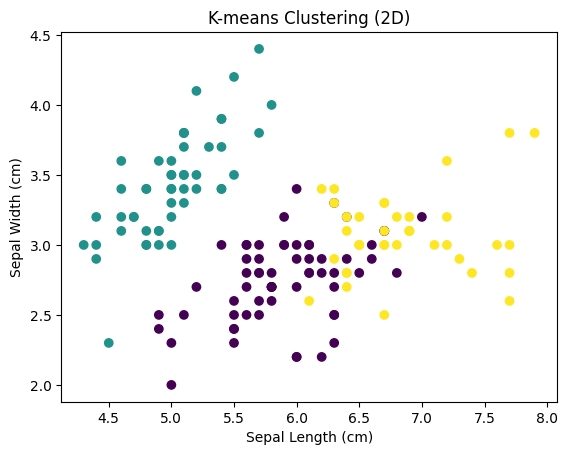

In [35]:
plt.scatter(iris_df['sepal length (cm)'],
            iris_df['sepal width (cm)'], c=cluster_labels)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering (2D)')
plt.show()



